<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 2</div>

Pandas

<center>
<img src="https://i1.wp.com/www.datascienceexamples.com/wp-content/uploads/2019/10/python-and-pandas.jpg?resize=800%2C286&ssl=1" width=1200>
</center>

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    6
3    4
4    4
5    2
6    3
7    5
8    4
9    6
dtype: int64

In [3]:
s.value_counts()

4    3
3    2
6    2
1    1
2    1
5    1
dtype: int64

In [4]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [5]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.031303,0.609210,-0.823136,0.778197
1,0.031146,0.353173,0.215949,2.026113
2,0.049626,0.303040,0.618071,0.697783
3,0.981011,-0.297492,-1.231440,-0.020695
4,0.268867,-0.543009,-0.360949,0.869697
5,1.184060,0.160834,-1.153305,-0.008718
6,-0.357355,2.430143,0.071413,0.351957
7,0.646935,-0.996372,2.338840,1.361334
8,-2.158100,0.012826,-0.450350,-2.112151
9,-2.134192,1.482367,0.761954,-0.363071


In [6]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.031303,0.609210,-0.823136,0.778197
1,0.031146,0.353173,0.215949,2.026113
2,0.049626,0.303040,0.618071,0.697783
3,0.981011,-0.297492,-1.231440,-0.020695
4,0.268867,-0.543009,-0.360949,0.869697
5,1.184060,0.160834,-1.153305,-0.008718
6,-0.357355,2.430143,0.071413,0.351957
7,0.646935,-0.996372,2.338840,1.361334
8,-2.158100,0.012826,-0.450350,-2.112151
9,-2.134192,1.482367,0.761954,-0.363071


In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [10]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [11]:
df = pd.DataFrame({
    
"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)
    
     })
df

,A,B,C,D
0,foo,one,-0.861342,0.906620
1,bar,one,-0.111113,-0.261550
2,foo,two,-0.262672,1.043294
3,bar,three,-1.115744,-0.302421
4,foo,two,0.846745,-0.636924
5,bar,two,-1.285921,0.767787
6,foo,one,-0.397579,0.469513
7,foo,three,1.086323,1.284010


In [12]:
df.groupby("A").sum()

/tmp/ipykernel_19/10288373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("A").sum()


,C,D
A,,
bar,-2.512778,0.203817
foo,0.411475,3.066514


In [13]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.111113 -0.261550
    three -1.115744 -0.302421
    two   -1.285921  0.767787
foo one   -1.258921  1.376134
    three  1.086323  1.284010
    two    0.584073  0.406370

In [14]:
tuples = list(zip(*[
["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
["one", "two", "one", "two", "one", "two", "one", "two"]
]))

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.358925 -1.380228
      two     0.016147  0.458244
baz   one    -0.917716  0.903255
      two    -1.872614 -1.585080

In [15]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.358925
               B   -1.380228
       two     A    0.016147
               B    0.458244
baz    one     A   -0.917716
               B    0.903255
       two     A   -1.872614
               B   -1.585080
dtype: float64

In [16]:
stacked.unstack()

A         B
first second                    
bar   one    -1.358925 -1.380228
      two     0.016147  0.458244
baz   one    -0.917716  0.903255
      two    -1.872614 -1.585080

In [17]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.358925  0.016147
      B -1.380228  0.458244
baz   A -0.917716 -1.872614
      B  0.903255 -1.585080

In [18]:
df = pd.DataFrame({
    
"A": ["one", "one", "two", "three"] * 3,
"B": ["A", "B", "C"] * 4,
"C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
"D": np.random.randn(12),
"E": np.random.randn(12)
    
})
df

,A,B,C,D,E
0,one,A,foo,-1.777885,-0.168020
1,one,B,foo,0.409217,0.502005
2,two,C,foo,-0.098634,0.238648
3,three,A,bar,-0.548190,-0.514785
4,one,B,bar,1.730446,1.070337
5,one,C,bar,0.163921,-1.324113
6,two,A,foo,-0.820180,0.239612
7,three,B,foo,-1.438440,0.148369
8,one,C,foo,0.475489,0.789678
9,one,A,bar,-0.257625,0.321902


In [19]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.257625 -1.777885
      B  1.730446  0.409217
      C  0.163921  0.475489
three A -0.548190       NaN
      B       NaN -1.438440
      C  0.050847       NaN
two   A       NaN -0.820180
      B  1.225759       NaN
      C       NaN -0.098634

In [20]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    23612
Freq: 5T, dtype: int64

In [21]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.383737
2012-03-07   -1.016959
2012-03-08    0.251642
2012-03-09   -1.033933
2012-03-10    0.319476
Freq: D, dtype: float64

In [22]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.383737
2012-03-07 00:00:00+00:00   -1.016959
2012-03-08 00:00:00+00:00    0.251642
2012-03-09 00:00:00+00:00   -1.033933
2012-03-10 00:00:00+00:00    0.319476
Freq: D, dtype: float64

In [23]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.626548
2012-02-29    1.714657
2012-03-31   -0.968050
2012-04-30   -0.240917
2012-05-31    0.274155
Freq: M, dtype: float64

In [24]:
ps = ts.to_period()
ps

2012-01   -0.626548
2012-02    1.714657
2012-03   -0.968050
2012-04   -0.240917
2012-05    0.274155
Freq: M, dtype: float64

In [25]:
ps.to_timestamp()

2012-01-01   -0.626548
2012-02-01    1.714657
2012-03-01   -0.968050
2012-04-01   -0.240917
2012-05-01    0.274155
Freq: MS, dtype: float64

In [26]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.006648
1990-06-01 09:00    0.067221
1990-09-01 09:00   -1.545026
1990-12-01 09:00   -1.611580
1991-03-01 09:00   -0.028255
Freq: H, dtype: float64

In [27]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [28]:
df["grade"] = df["raw_grade"].astype("category")
In [125]: df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [29]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

/tmp/ipykernel_19/2985790766.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [30]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [31]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [32]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [33]:
import matplotlib.pyplot as plt
plt.close("all")

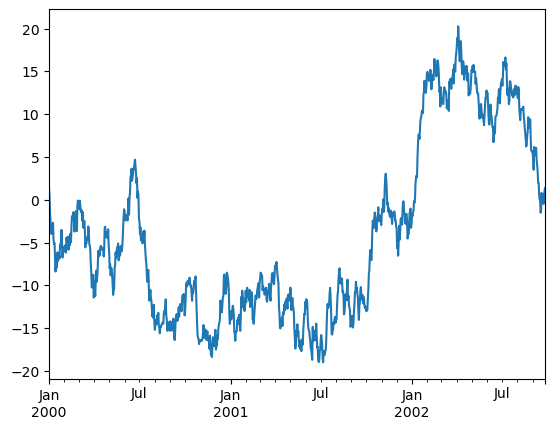

In [34]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

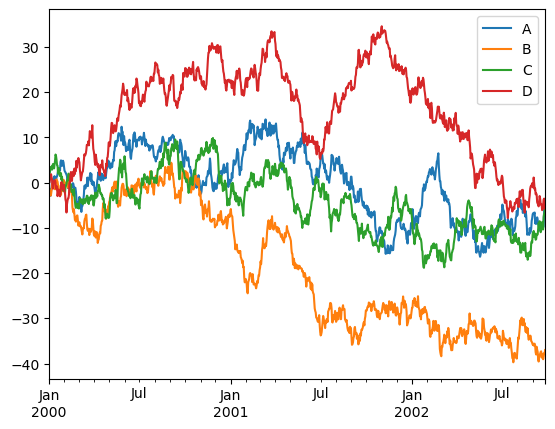

In [35]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

In [36]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.028334,-1.382950,1.354942,-0.027108
1,2000-01-02,-1.841400,-1.728610,1.954460,0.074718
2,2000-01-03,-1.899842,-2.446917,2.606798,0.872316
3,2000-01-04,-2.893192,-2.870546,3.329014,1.253337
4,2000-01-05,-1.713214,-2.528506,3.163879,1.865465
...,...,...,...,...,...
995,2002-09-22,-9.920154,-39.053542,-10.344308,-5.056747
996,2002-09-23,-9.685915,-38.507028,-7.607717,-3.767316
997,2002-09-24,-6.322042,-37.719630,-6.892630,-3.519776
998,2002-09-25,-3.874548,-37.885341,-6.688575,-5.730785


In [37]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.028334,-1.382950,1.354942,-0.027108
2000-01-02,-1.841400,-1.728610,1.954460,0.074718
2000-01-03,-1.899842,-2.446917,2.606798,0.872316
2000-01-04,-2.893192,-2.870546,3.329014,1.253337
2000-01-05,-1.713214,-2.528506,3.163879,1.865465
...,...,...,...,...
2002-09-22,-9.920154,-39.053542,-10.344308,-5.056747
2002-09-23,-9.685915,-38.507028,-7.607717,-3.767316
2002-09-24,-6.322042,-37.719630,-6.892630,-3.519776
2002-09-25,-3.874548,-37.885341,-6.688575,-5.730785


In [38]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.028334,-1.382950,1.354942,-0.027108
1,2000-01-02,-1.841400,-1.728610,1.954460,0.074718
2,2000-01-03,-1.899842,-2.446917,2.606798,0.872316
3,2000-01-04,-2.893192,-2.870546,3.329014,1.253337
4,2000-01-05,-1.713214,-2.528506,3.163879,1.865465
...,...,...,...,...,...
995,2002-09-22,-9.920154,-39.053542,-10.344308,-5.056747
996,2002-09-23,-9.685915,-38.507028,-7.607717,-3.767316
997,2002-09-24,-6.322042,-37.719630,-6.892630,-3.519776
998,2002-09-25,-3.874548,-37.885341,-6.688575,-5.730785


In [39]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.127538
b   -1.753499
c   -0.569498
d    0.502888
e   -0.844897
dtype: float64

In [40]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [41]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [42]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [43]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [44]:
s[0]

0.1275378738786545

In [45]:
s[:3]

a    0.127538
b   -1.753499
c   -0.569498
dtype: float64

In [46]:
s[s > s.median()]

a    0.127538
d    0.502888
dtype: float64

In [47]:
s[[4, 3, 1]]

e   -0.844897
d    0.502888
b   -1.753499
dtype: float64

In [48]:
np.exp(s)

a    1.136028
b    0.173167
c    0.565809
d    1.653489
e    0.429602
dtype: float64

In [49]:
s.array

<PandasArray>
[ 0.1275378738786545, -1.7534987167148526, -0.5694983705096484,
  0.5028875643802583, -0.8448971838267484]
Length: 5, dtype: float64

In [50]:
s.to_numpy()

array([ 0.12753787, -1.75349872, -0.56949837,  0.50288756, -0.84489718])

In [51]:
s["a"]

0.1275378738786545

In [52]:
s["e"] = 12.0
s

a     0.127538
b    -1.753499
c    -0.569498
d     0.502888
e    12.000000
dtype: float64

In [53]:
np.exp(s)

a         1.136028
b         0.173167
c         0.565809
d         1.653489
e    162754.791419
dtype: float64

In [54]:
s[1:] + s[:-1]

a         NaN
b   -3.506997
c   -1.138997
d    1.005775
e         NaN
dtype: float64

In [55]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -0.620343
1   -0.143638
2    0.279272
3   -0.003358
4   -0.242285
Name: something, dtype: float64

In [56]:
s2 = s.rename("different")
s2.name

'different'

In [57]:
d = {
"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
"two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [58]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [59]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [60]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [61]:
df.columns

Index(['one', 'two'], dtype='object')

In [62]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [63]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [64]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [65]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [66]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [67]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [68]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [69]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [70]:
pd.DataFrame({
    
("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    
})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [71]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [72]:
Point3D = namedtuple("Point3D", "x y z")

In [73]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [74]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [75]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [76]:
pd.DataFrame.from_dict(
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
orient="index",
columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [77]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [78]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [79]:
del df["two"]
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [80]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [81]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [82]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [83]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [85]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


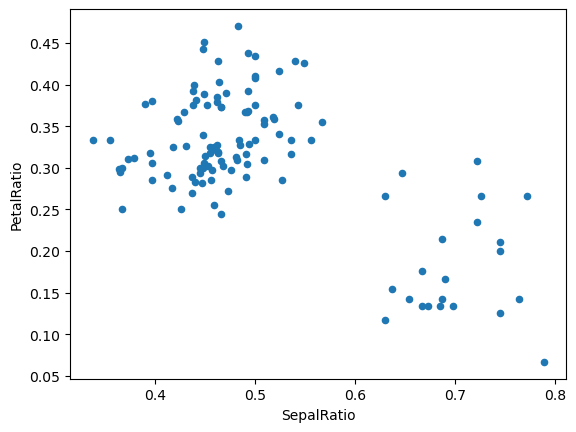

In [86]:
(iris.query("SepalLengthCm > 5").assign(
SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio"));

In [87]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [88]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,-0.241415,0.021818,0.486589,NaN
1,2.284769,0.001866,2.533489,NaN
2,1.078524,0.670461,-0.587653,NaN
3,1.261065,-0.217166,0.337972,NaN
4,-0.654643,-0.922537,-1.677240,NaN
5,-0.869590,-0.921381,-2.640811,NaN
6,0.584160,0.868525,-1.141987,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [89]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [90]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [91]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [92]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [93]:
np.exp(df)

,A,B,C,D
0,0.404334,0.966255,0.650460,0.679763
1,5.870467,0.973921,6.570585,1.820460
2,3.716597,1.198841,2.877488,1.041327
3,3.854584,0.559365,0.236875,1.419878
4,1.066649,1.143716,0.166570,11.269816
5,0.566746,1.471748,0.247501,4.605709
6,1.303385,2.872217,0.476577,0.607883
7,1.792288,0.694953,3.907077,2.115258
8,1.065894,1.681661,0.368831,1.090402
9,0.496760,1.044754,0.511318,0.379025


In [94]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [95]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
ser1

a    1
b    2
c    3
dtype: int64

In [96]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [97]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [98]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [99]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.662870,-1.779301,-1.187802,0.195185,0.600667,-2.289641,0.092790,1.222335,0.567605,0.139840,1.110909,0.328790
1,1.350621,1.077888,-1.055744,-0.405750,-1.448090,-0.404262,-1.702477,0.416208,-2.368847,-0.531691,-1.594011,1.133153
2,0.888262,-0.261351,2.144140,-0.107626,-1.011809,-0.190956,-0.132447,0.415201,-0.060077,0.823205,1.147252,0.595219


In [100]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.356177,-0.595257,-0.238585,1.049686,0.721124,-0.899853,0.371608,0.022147,0.432217,-0.732194,0.701162,-0.879283
1,1.050280,0.575136,0.518858,-0.742168,-0.658549,0.336616,-0.657468,0.287630,-0.454640,0.168260,-0.696984,0.692678
2,-0.744530,0.489430,0.205030,0.019272,1.891128,-0.578666,0.033061,0.679092,1.322176,-0.728209,1.819453,-0.115580


In [101]:
datafile = {
"filename": ["filename_01", "filename_02"],
"path": [
"media/user_name/storage/folder_01/filename_01",
"media/user_name/storage/folder_02/filename_02",]
}

pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [102]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [103]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.906954,0.045565
1,-1.904452,0.329333
2,1.561317,1.655682
3,-0.841218,-0.173388
4,-0.632575,1.358439


In [104]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [105]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0    1.539574
1    0.136040
2    0.822875
3    0.256639
4   -3.028717
dtype: float64

In [106]:
df[:2]

,A,B,C
2000-01-01,0.136817,1.521723,1.694820
2000-01-02,-0.006485,1.243043,-0.170536


In [107]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,0.136817,1.521723,1.694820
2000-01-02,-0.006485,1.243043,-0.170536
2000-01-03,1.536105,0.099296,0.753435
2000-01-04,0.268871,-0.455022,-1.486370
2000-01-05,-1.491998,-1.318507,-2.235330
2000-01-06,0.631134,1.707711,0.021565
2000-01-07,-0.647449,-1.422492,-1.081269
2000-01-08,-0.973952,1.197755,-0.696390


In [108]:
s.array

<PandasArray>
[-0.16301249506661783,
  -0.3990937109118798,
  0.12221625648689939,
   1.1539186443253713,
  0.16166367763217654]
Length: 5, dtype: float64

In [109]:
s.index.array

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

In [110]:
s.to_numpy()

array([-0.1630125 , -0.39909371,  0.12221626,  1.15391864,  0.16166368])

In [111]:
np.asarray(s)

array([-0.1630125 , -0.39909371,  0.12221626,  1.15391864,  0.16166368])

In [112]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [113]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

In [114]:
df = pd.DataFrame({
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
})

df

,one,two,three
a,0.125106,0.133597,NaN
b,-1.473745,-0.495953,-0.791605
c,-0.294726,1.388725,-0.641793
d,NaN,1.259341,0.532810


In [115]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

,one,two,three
a,1.598851,0.629550,NaN
b,0.000000,0.000000,0.000000
c,1.179019,1.884678,0.149812
d,NaN,1.755294,1.324415


In [116]:
df.sub(row, axis=1)

,one,two,three
a,1.598851,0.629550,NaN
b,0.000000,0.000000,0.000000
c,1.179019,1.884678,0.149812
d,NaN,1.755294,1.324415


In [117]:
df.sub(column, axis="index")

,one,two,three
a,-0.008491,0.0,NaN
b,-0.977792,0.0,-0.295652
c,-1.683451,0.0,-2.030518
d,NaN,0.0,-0.726531


In [118]:
df.sub(column, axis=0)

,one,two,three
a,-0.008491,0.0,NaN
b,-0.977792,0.0,-0.295652
c,-1.683451,0.0,-2.030518
d,NaN,0.0,-0.726531


In [119]:
dfmi = df.copy()
In [27]: dfmi.index = pd.MultiIndex.from_tuples(
[(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)

dfmi.sub(column, axis=0, level="second")

one       two  \
first second                       
1     a      -0.008491  0.000000   
      b      -0.977792  0.000000   
      c      -1.683451  0.000000   
2     a            NaN  1.125743   

                 three  
first second            
1     a            NaN  
      b      -0.295652  
      c      -2.030518  
2     a       0.399212

In [120]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [121]:
div, rem = divmod(df,3)
div

,one,two,three
a,0.0,0.0,NaN
b,-1.0,-1.0,-1.0
c,-1.0,0.0,-1.0
d,NaN,0.0,0.0


In [122]:
idx = pd.Index(np.arange(10))
idx

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8,
            9],
           dtype='int64')

In [123]:
div, rem = divmod(idx, 3)
div

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2,
            3],
           dtype='int64')

In [124]:
df.gt(df)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [125]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [126]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [127]:
(df > 0).any().any()

True

In [128]:
pd.DataFrame(columns=list("ABC")).empty

True

In [129]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [130]:
(df + df).equals(df * 2)

True

In [131]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

False

In [132]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [133]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

In [134]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [135]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [136]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

In [137]:
df1 = pd.DataFrame(
{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame({
"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
})

df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [138]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [139]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [140]:
df.sum(0, skipna=False)

one          NaN
two      2.28571
three        NaN
dtype: float64

In [141]:
df.sum(axis=1, skipna=True)

a    0.258704
b   -2.761303
c    0.452206
d    1.792151
dtype: float64

In [142]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [143]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

In [144]:
np.mean(df["one"])

-0.5477882202756625

In [145]:
np.mean(df["one"].to_numpy())

nan

In [146]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

In [147]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

count    500.000000
mean      -0.031699
std        0.970918
min       -3.456387
25%       -0.649686
50%       -0.002142
75%        0.601006
max        3.199794
dtype: float64

In [148]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.000306,0.021413,0.128667,0.064873,0.041193
std,0.976245,1.049156,1.029158,0.978178,0.999724
min,-2.802847,-3.256928,-3.292894,-2.855787,-2.703263
25%,-0.598263,-0.684308,-0.557607,-0.570076,-0.594972
50%,-0.051723,0.021613,0.175735,0.087114,0.033099
75%,0.654742,0.724492,0.836842,0.751838,0.670477
max,3.254276,2.681099,2.914642,2.843842,2.886641


In [149]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean      -0.031699
std        0.970918
min       -3.456387
5%        -1.637616
25%       -0.649686
50%       -0.002142
75%        0.601006
95%        1.474151
max        3.199794
dtype: float64

In [150]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object